In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error 

# Reading the dataset

In [2]:
data = pd.read_csv("./dataset/Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data = data.drop(["Unnamed: 0"], axis = 1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Checking for null values in dataset

In [6]:
data.isnull().values.any()

False

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Plotting scatterplot to see the relation between attributes

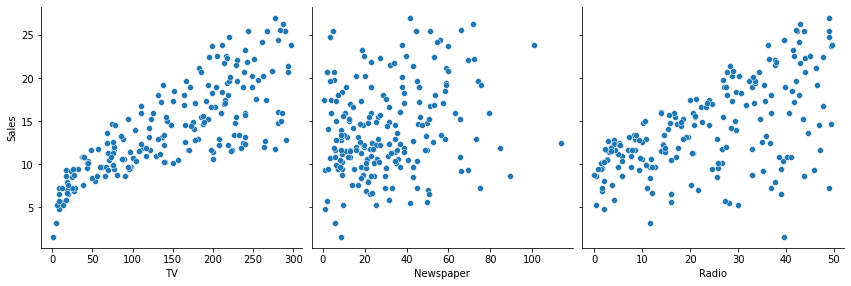

In [8]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

# Ploting Correlation of features

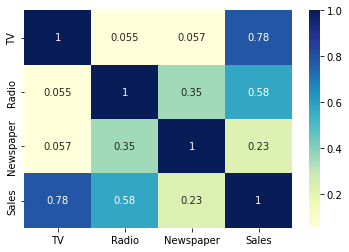

In [9]:
# Let's see the correlation between different variables.
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Normalizing the data between 0 to 1

In [10]:

Y = data.Sales.values
X = data.drop(["Sales"], axis = 1)
X = (X - np.min(X))/(np.max(X)-np.min(X)).values

X.head()

,TV,Radio,Newspaper
0,0.775786,0.762097,0.605981
1,0.148123,0.792339,0.394019
2,0.055800,0.925403,0.606860
3,0.509976,0.832661,0.511873
4,0.609063,0.217742,0.510994


# Train and Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train)
print("features: ", X_train.shape)
print("labels: ", Y_train.shape)
print("test_features: ", X_test.shape)
print("test_labels: ", Y_test.shape)

           TV     Radio  Newspaper
142  0.743321  0.669355   0.330695
57   0.458235  0.387097   0.143360
145  0.472100  0.038306   0.076517
80   0.256003  0.538306   0.193492
93   0.846128  0.735887   0.633245
..        ...       ...        ...
197  0.596212  0.187500   0.053650
33   0.895840  0.403226   0.000000
141  0.652689  0.713710   0.662269
156  0.315184  0.877016   0.441513
49   0.223876  0.235887   0.321020

[160 rows x 3 columns]
features:  (160, 3)
labels:  (160,)
test_features:  (40, 3)
test_labels:  (40,)


# Linear Regression using Gradient Descent

In [12]:
class LinearRegression() :
      
    def __init__( self, learning_rate, iterations ) :         
        self.learning_rate = learning_rate          
        self.iterations = iterations
          
    # Function for model training            
    def fit( self, X, Y ) :  
        samples, features = X.shape
        self.W = np.zeros(features)  
        self.b = 0          
        self.X = X.values
        self.Y = Y
        
        # gradient descent               
        for i in range( self.iterations ) :   
            Y_pred = np.dot(self.X, self.W) + self.b 

            # calculate gradients  
            dW = - (2*(self.X.T).dot(self.Y - Y_pred))/samples          
            db = - 2 * np.sum( self.Y - Y_pred )/samples

            # update weights
            self.W = self.W - self.learning_rate * dW
            self.b = self.b - self.learning_rate * db
            
            Mse = mean_squared_error(self.Y, Y_pred,squared =False)
           # print("MSE", Mse)
        return self

    def predict( self, X ):     
        answer = X.dot(self.W)+self.b  
        return answer

In [13]:
l_reg = LinearRegression( learning_rate = 0.01,iterations = 1000 )
l_reg.fit( X_train, Y_train )
print("Weights ", l_reg.W)
print("Bias " ,l_reg.b)

Weights  [10.99696519  7.67986914  1.75641558]
Bias  4.601138591144096


In [14]:
    Y_pred = l_reg.predict(X_test)

    print( "Predicted values ", np.round( Y_pred.values[:10], 2 ) )      
    print( "Real values      ", Y_test[:10] )

Predicted values  [15.75 18.37  8.29 12.06 13.01 11.91 14.69 13.68  8.88 12.49]
Real values       [16.6 18.9  5.6 11.9 10.4 12.  15.5 14.2  9.6 10.8]


# Calculating mean square error

In [15]:
from sklearn.metrics import mean_squared_error 
Mse = mean_squared_error(Y_test, Y_pred,squared =False)
print("MSE", Mse)

MSE 1.6254158528024896
